In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_original = pd.read_csv("C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//990_output.csv")

In [13]:
data_990 = df_original.copy()

In [4]:
print(data_990.head())
print(data_990.shape)

         EIN                           BusinessName  \
0  860721792      ARIZONA MUSEUM OF NATURAL HISTORY   
1  364016275  WISCONSIN ILLINOIS SENIOR HOUSING INC   
2  811374280                        PHILANTHROPITCH   
3  811374280                        PHILANTHROPITCH   
4  811374280                        PHILANTHROPITCH   

                      Address      City State    ZIP  County  TaxYear  \
0   53 NORTH MACDONALD STREET      MESA    AZ  85201    Mesa     2019   
1   13185 W GREEN MOUNTAIN DR  LAKEWOOD    CO  80228  Denver     2021   
2  1023 SPRINGDALE ROAD NO 1J    AUSTIN    TX  78721  Austin     2020   
3  1023 SPRINGDALE ROAD NO 1J    AUSTIN    TX  78721  Austin     2020   
4  1023 SPRINGDALE ROAD NO 1J    AUSTIN    TX  78721  Austin     2020   

   TotalRevenue  TotalExpenses  ...  RecipientIrsSection  \
0        234668         352266  ...            501(C)(3)   
1      62323598       60254855  ...                  NaN   
2        826882         896435  ...            501

ZIPCODE ZCTA FILE CREATION

In [5]:
zcta_df = pd.read_csv("Data\Census\ZCTA.csv")
zcta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33774 entries, 0 to 33773
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ZCTA     33774 non-null  object
 1   P1_001N  33774 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.8+ KB


In [7]:
zip_zcta_xref = pd.read_csv("Data\Census\zip_zcta_xref.csv")
zip_zcta_xref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41131 entries, 0 to 41130
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   zip_code  41131 non-null  int64  
 1   zcta      41125 non-null  float64
 2   source    41131 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 964.1+ KB


In [11]:
data_990['ZIP'] = data_990['ZIP'].astype(str).str[:5]
zcta_df['ZCTA'] = zcta_df['ZCTA'].str.replace('ZCTA5 ', '')

merged_df = pd.merge(data_990, zcta_df, left_on='ZIP', right_on='ZCTA', how='left', indicator=True)

total_matches = merged_df[merged_df['_merge'] == 'both'].shape[0]
total_non_matches = merged_df[merged_df['_merge'] != 'both'].shape[0]

print(f"Total Matches: {total_matches}")
print(f"Total Non-Matches: {total_non_matches}")

unmatched_zips = merged_df[merged_df['_merge'] != 'both']['ZIP']
matched_zips = merged_df[merged_df['_merge'] == 'both']['ZIP']

zip_zcta_xref['zip_code'] = zip_zcta_xref['zip_code'].astype(str)

unmatched_in_mapping = zip_zcta_xref[zip_zcta_xref['zip_code'].isin(unmatched_zips)]

matched_in_mapping = zip_zcta_xref[zip_zcta_xref['zip_code'].isin(matched_zips)]

print(f"Total unmatched ZIPs found in new mapping dataset: {unmatched_in_mapping.shape[0]}")
print(f"Total matched ZIPs found in new mapping dataset: {matched_in_mapping.shape[0]}")

print("Unmatched ZIPs found in new mapping dataset:\n", unmatched_in_mapping)
print("Matched ZIPs found in new mapping dataset:\n", matched_in_mapping)

Total Matches: 73732
Total Non-Matches: 8792
Total unmatched ZIPs found in new mapping dataset: 387
Total matched ZIPs found in new mapping dataset: 1287
Unmatched ZIPs found in new mapping dataset:
       zip_code     zcta    source
1118     72716  72712.0  geonames
1199     71754  71753.0  geonames
1212     72402  72401.0  geonames
1213     72403  72401.0  geonames
1265     71657  71655.0  geonames
...        ...      ...       ...
36344    76307  76301.0  geonames
36374    78627  78626.0  geonames
36381    78646  78641.0  geonames
36386    78680  78626.0  geonames
36389    78683  78626.0  geonames

[387 rows x 3 columns]
Matched ZIPs found in new mapping dataset:
       zip_code     zcta    source
1087     72042  72042.0  geonames
1109     72653  72653.0  geonames
1114     72712  72712.0  geonames
1124     72734  72734.0  geonames
1127     72745  72745.0  geonames
...        ...      ...       ...
36387    78681  78681.0  geonames
36392    78114  78114.0  geonames
36393    78121  78

In [12]:
zip_zcta_xref['zip_code'] = zip_zcta_xref['zip_code'].astype(str)
data_990['ZIP'] = data_990['ZIP'].astype(str)

# Step 2: Merge the original dataset with the new mapping dataset to check for matches
matched_df = pd.merge(data_990, zip_zcta_xref, left_on='ZIP', right_on='zip_code', how='left', indicator=True)

# Step 3: Calculate the number of matches and non-matches
total_zips = data_990.shape[0]
matched_zips = matched_df[matched_df['_merge'] == 'both'].shape[0]
unmatched_zips = matched_df[matched_df['_merge'] == 'left_only'].shape[0]

# Step 4: Print results
print(f"Total ZIPs in original dataset: {total_zips}")
print(f"Matched ZIPs in new mapping dataset: {matched_zips}")
print(f"Unmatched ZIPs in new mapping dataset: {unmatched_zips}")

# Optional: View unmatched ZIPs
unmatched_zips_df = matched_df[matched_df['_merge'] == 'left_only'][['ZIP']]
print("Unmatched ZIPs:\n", unmatched_zips_df)

Total ZIPs in original dataset: 82524
Matched ZIPs in new mapping dataset: 82504
Unmatched ZIPs in new mapping dataset: 20
Unmatched ZIPs:
          ZIP
10011  85219
10012  85219
10013  85219
37283  85219
37284  85219
37285  85219
60548  85288
60549  85288
60550  85288
60551  85288
60552  85288
60553  85288
60554  85288
60555  85288
64806  81667
64807  81667
71215  75308
71216  75308
77799  75308
77800  75308


In [10]:
unmatched_zips_df = matched_df[matched_df['_merge'] == 'left_only'][['ZIP']]

unmatched_zips_df['ZIP_length'] = unmatched_zips_df['ZIP'].apply(len)

nine_digit_zips_df = unmatched_zips_df[unmatched_zips_df['ZIP_length'] == 9]

num_nine_digit_zips = nine_digit_zips_df.shape[0]

print(f"Number of unmatched 9-digit ZIPs: {num_nine_digit_zips}")
print("Unmatched 9-digit ZIPs:\n", nine_digit_zips_df['ZIP'])

Number of unmatched 9-digit ZIPs: 11985
Unmatched 9-digit ZIPs:
 53       802105817
59       769024028
67       870430121
101      761043121
190      782166631
           ...    
82451    773472105
82452    773472105
82453    773472105
82497    802025704
82498    802025704
Name: ZIP, Length: 11985, dtype: object


In [16]:
data_990['ZIP_5digit'] = data_990['ZIP'].astype(str).str[:5]

zip_zcta_xref['zip_code'] = zip_zcta_xref['zip_code'].astype(str).str.split('.').str[0]

merged_df = pd.merge(data_990, zip_zcta_xref[['zip_code', 'zcta']], 
                     left_on='ZIP_5digit', 
                     right_on='zip_code', 
                     how='left')

merged_df['zcta'] = merged_df['zcta'].astype(str).str.split('.').str[0].str.zfill(5).str.strip()
zcta_df['ZCTA'] = zcta_df['ZCTA'].astype(str).str.strip()

final_df = pd.merge(merged_df[['ZIP_5digit', 'zcta']], 
                    zcta_df[['ZCTA', 'P1_001N']], 
                    left_on='zcta', 
                    right_on='ZCTA', 
                    how='left')

output_df = pd.DataFrame({
    'ZIP': data_990['ZIP'],  
    'P1_001N': final_df['P1_001N']
})

output_df.to_csv('zip_population.csv', index=False)

print("File saved as 'zip_population.csv'")

File saved as 'zip_population.csv'


In [18]:
zip_zcta_xref['zcta'] = zip_zcta_xref['zcta'].astype(str).str.split('.').str[0].str.zfill(5).str.strip()
zcta_df['ZCTA'] = zcta_df['ZCTA'].astype(str).str.strip()

merged_zip_zcta = pd.merge(zip_zcta_xref[['zip_code', 'zcta']], 
                           zcta_df[['ZCTA', 'P1_001N']], 
                           left_on='zcta', 
                           right_on='ZCTA', 
                           how='left')

output_df = merged_zip_zcta[['zip_code', 'P1_001N']]

output_df.to_csv('zip_code_population.csv', index=False)

print("File saved as 'zip_code_population.csv'")

File saved as 'zip_code_population.csv'


In [5]:
data_990.drop_duplicates(inplace=True)

In [6]:
data_990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80398 entries, 0 to 82523
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EIN                   80398 non-null  int64  
 1   BusinessName          80398 non-null  object 
 2   Address               80398 non-null  object 
 3   City                  80398 non-null  object 
 4   State                 80398 non-null  object 
 5   ZIP                   80398 non-null  int64  
 6   County                80398 non-null  object 
 7   TaxYear               80398 non-null  int64  
 8   TotalRevenue          80398 non-null  int64  
 9   TotalExpenses         80398 non-null  int64  
 10  TotalAssets           80398 non-null  int64  
 11  TotalLiabilities      80398 non-null  int64  
 12  GrantsAndAllocations  80398 non-null  int64  
 13  RecipientName         80344 non-null  object 
 14  RecipientEIN          74399 non-null  float64
 15  RecipientIrsSection

In [7]:
data_990.isnull().sum()

EIN                         0
BusinessName                0
Address                     0
City                        0
State                       0
ZIP                         0
County                      0
TaxYear                     0
TotalRevenue                0
TotalExpenses               0
TotalAssets                 0
TotalLiabilities            0
GrantsAndAllocations        0
RecipientName              54
RecipientEIN             5999
RecipientIrsSection     15569
RecipientAddress         1205
RecipientCity            1204
RecipientState           1204
RecipientZIP             1204
RecipientCounty             0
CashGrantAmount          3522
NonCashGrantAmount      43560
MethodOfNonCashGrant    74645
GrantPurpose             3479
dtype: int64

In [8]:
data_990["State"].value_counts()

TX    39742
CO    17888
AZ     9495
OK     7084
NM     2605
NV     1939
AR     1645
Name: State, dtype: int64

In [9]:
data_990["TaxYear"].value_counts()

2020    34681
2021    23760
2022    16223
2019     5664
2018       70
Name: TaxYear, dtype: int64

In [10]:
data_990.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EIN,80398.0,NaN,NaN,NaN,624926641.882534,250614940.914738,10595871.0,411804970.0,742401941.0,840468242.0,990209180.0
BusinessName,80398,5198,Greater Houston Community Foundation,6820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,80398,4924,515 Post Oak BLVD 1000,6820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,80398,910,Houston,10017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,80398,7,TX,39742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,80398.0,NaN,NaN,NaN,110484128.511605,274381836.371899,71601.0,76384.0,78752.0,85016.0,897033933.0
County,80398,648,Houston,13332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TaxYear,80398.0,NaN,NaN,NaN,2020.626906,0.885209,2018.0,2020.0,2020.0,2021.0,2022.0
TotalRevenue,80398.0,NaN,NaN,NaN,130855746.963594,381683916.656572,-3468316.0,3812814.0,23386096.0,196172582.0,8495325836.0
TotalExpenses,80398.0,NaN,NaN,NaN,117677230.423406,356942986.830436,0.0,3447187.0,16059162.0,162571997.0,8128108942.0


State
AR     57615451
AZ    143387039
CO     52302422
NM     31836538
NV     48509856
OK    191820600
TX    165891633


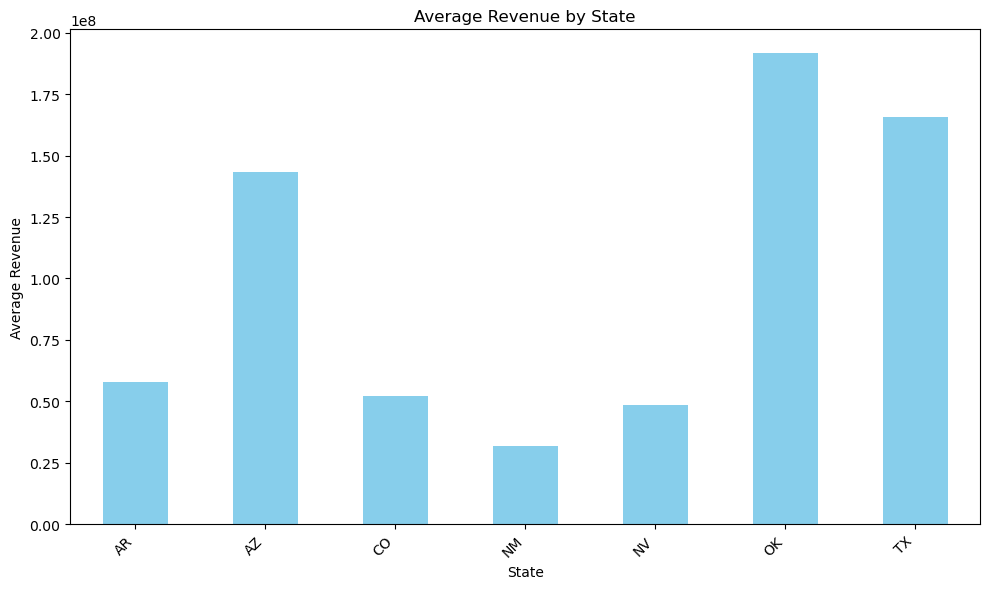

In [11]:
average_revenue_by_state = data_990.groupby('State')['TotalRevenue'].mean()
average_revenue_by_state = average_revenue_by_state.apply(lambda x: int(x))

plt.figure(figsize=(10, 6))
average_revenue_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Revenue by State")
plt.xlabel("State")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

print(average_revenue_by_state.to_string())
plt.show()

State
AR     11781309
AZ     42836314
CO     21539762
NM      9359448
NV     23364475
OK    175241979
TX    104405293


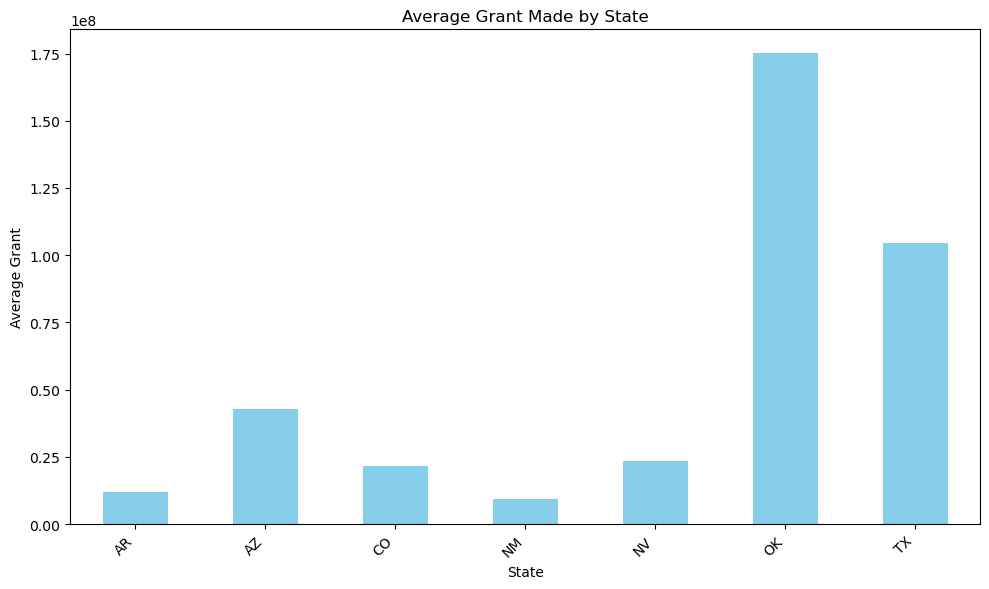

In [12]:
average_grant_by_state = data_990.groupby('State')['GrantsAndAllocations'].mean()
average_grant_by_state = average_grant_by_state.apply(lambda x: int(x))

plt.figure(figsize=(10, 6))
average_grant_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Grant Made by State")
plt.xlabel("State")
plt.ylabel("Average Grant")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

print(average_grant_by_state.to_string())
plt.show()

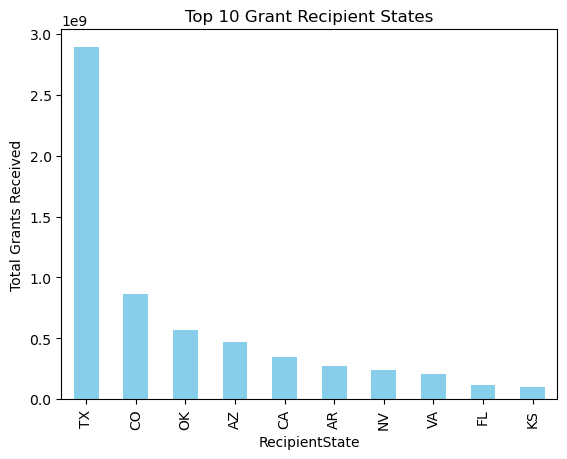

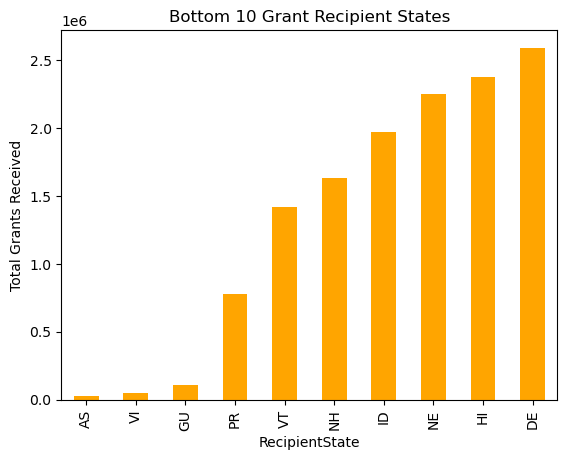

In [13]:
data_990['total_grant_rcd'] = data_990['NonCashGrantAmount'] + data_990['CashGrantAmount']
total_grants_by_state = data_990.groupby('RecipientState')['total_grant_rcd'].sum()

top_10_states = total_grants_by_state.nlargest(10)
top_10_states.plot(kind='bar', color='skyblue', title='Top 10 Grant Recipient States')
plt.ylabel('Total Grants Received')
plt.show()

bottom_10_states = total_grants_by_state.nsmallest(10)
bottom_10_states.plot(kind='bar', color='orange', title='Bottom 10 Grant Recipient States')
plt.ylabel('Total Grants Received')
plt.show()

TotalRevenue
Skew : 13.17


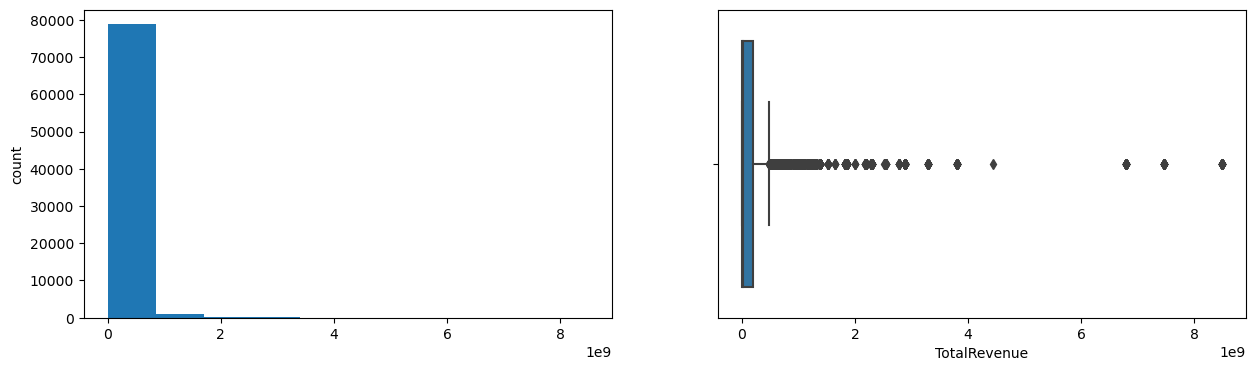

GrantsAndAllocations
Skew : 2.73


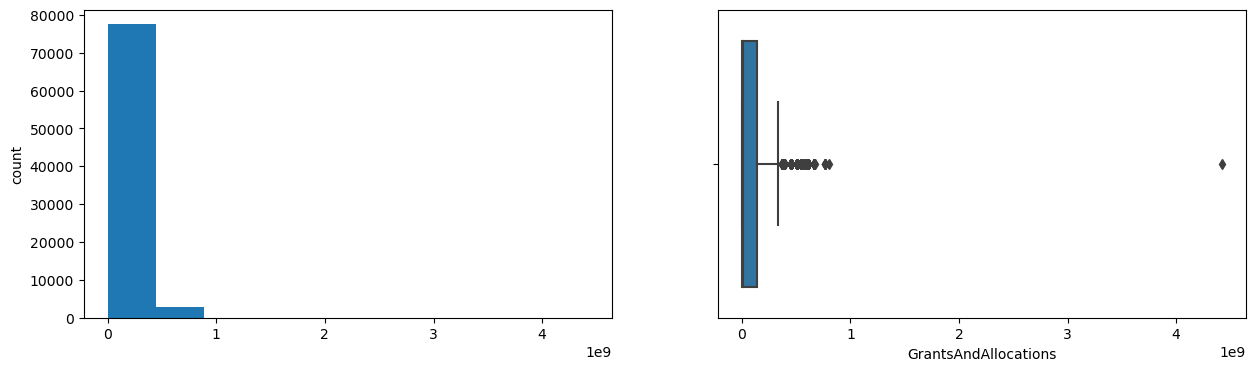

CashGrantAmount
Skew : 84.19


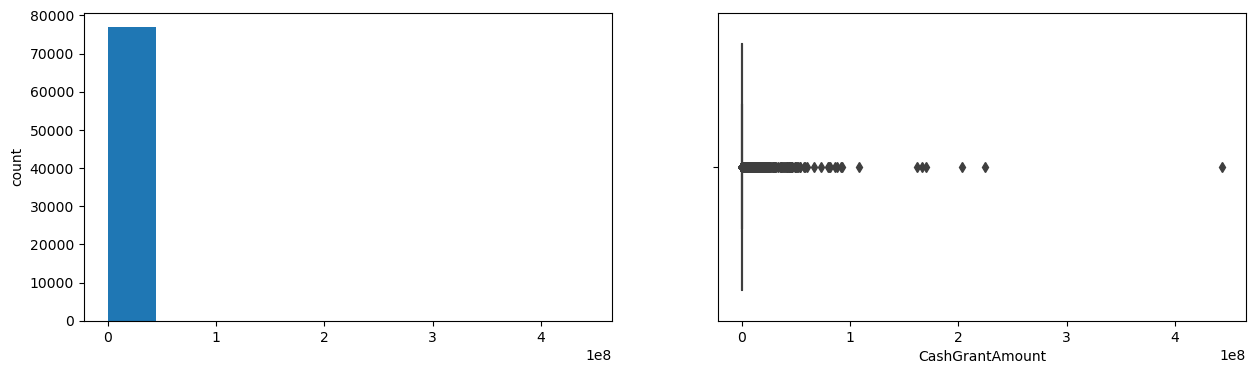

NonCashGrantAmount
Skew : 53.72


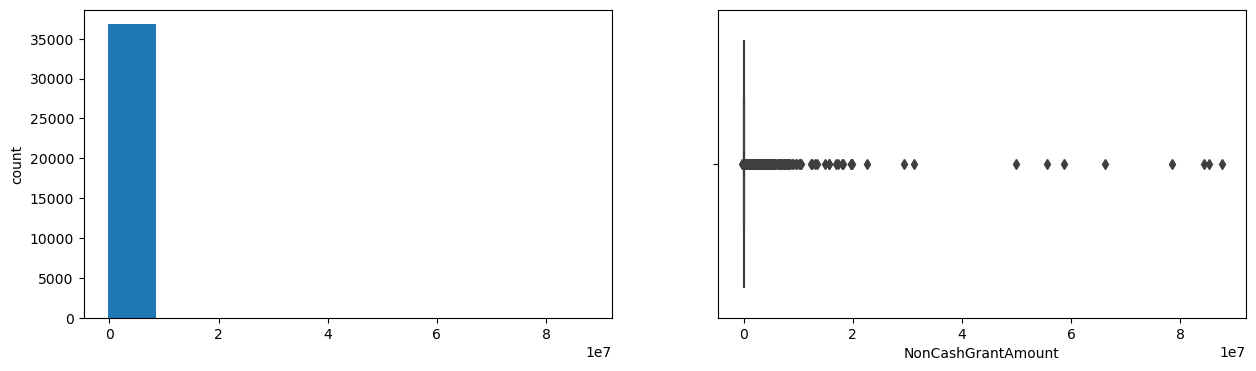

total_grant_rcd
Skew : 44.98


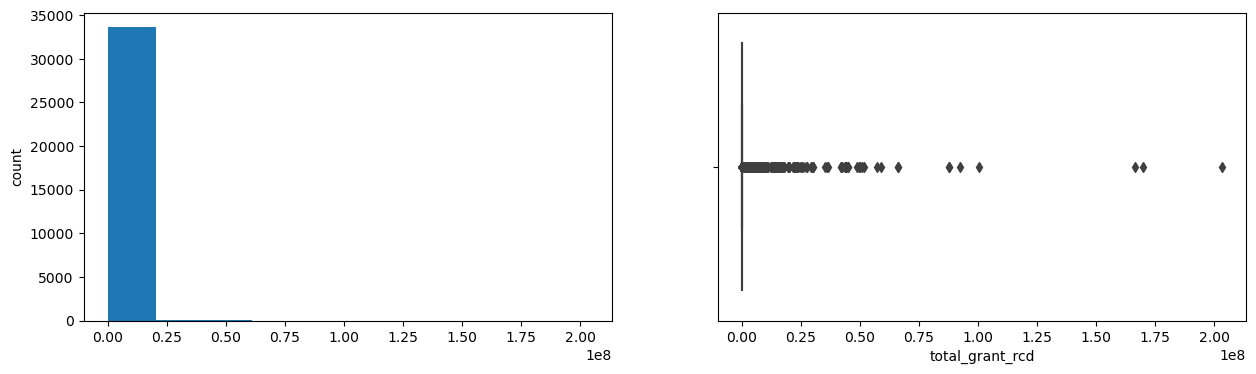

In [14]:
num_cols = ['TotalRevenue', 'GrantsAndAllocations', 'CashGrantAmount', 'NonCashGrantAmount', 'total_grant_rcd']

for col in num_cols:
    print(col)
    print('Skew :', round(data_990[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data_990[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_990[col])
    plt.show()

<Figure size 1300x1700 with 0 Axes>

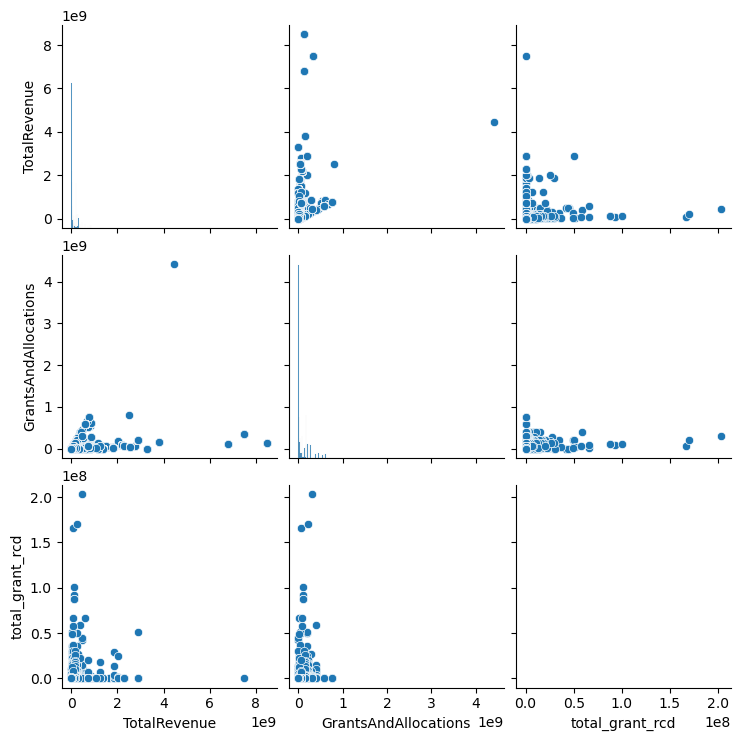

In [15]:

num_cols = ['TotalRevenue', 'GrantsAndAllocations', 'total_grant_rcd']
plt.figure(figsize=(13,17))
sns.pairplot(data=data_990[num_cols])
plt.show()

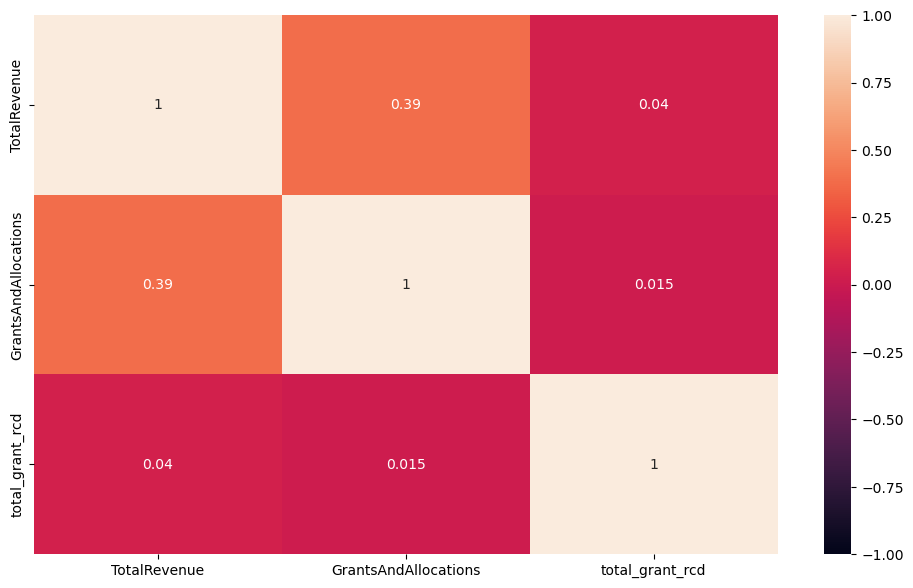

In [16]:
num_cols = ['TotalRevenue', 'GrantsAndAllocations', 'total_grant_rcd']

plt.figure(figsize=(12, 7))
sns.heatmap(data_990[num_cols].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

NTEE Code Join

In [8]:
eo_tx = pd.read_csv("C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//EOBMF//eo_tx.csv")

(143212, 28)

In [10]:
print(eo_tx.head())
print(eo_tx.shape)

        EIN                                   NAME  \
0  10303581       DEL LAGO ESTATES UTILITY COMPANY   
1  10342663               HELEN F WYLIE FOUNDATION   
2  10352472  ST AUGUSTINE TRUST FUND 40-6130848230   
3  10491193             CASCO BAY CHURCH OF CHRIST   
4  10500483            LEONE R MURRAY TRUST UART 4   

                             ICO         STREET    CITY STATE         ZIP  \
0                            NaN    PO BOX 1860  CONROE    TX  77305-1860   
1          % MAINE NATIONAL BANK  PO BOX 653067  DALLAS    TX  75265-3067   
2                            NaN  PO BOX 653067  DALLAS    TX  75265-3067   
3           % STS CONSULTING LLC    PO BOX 1081  ARGYLE    TX  76226-1081   
4  % FLEET PRIVATE CLIENTS GROUP  PO BOX 653067  DALLAS    TX  75265-3067   

   GROUP  SUBSECTION  AFFILIATION  ...  ASSET_CD  INCOME_CD  FILING_REQ_CD  \
0      0           1            0  ...         4          3              7   
1      0           3            3  ...         5        

In [14]:
data_990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82524 entries, 0 to 82523
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EIN                   82524 non-null  int64  
 1   BusinessName          82524 non-null  object 
 2   Address               82524 non-null  object 
 3   City                  82524 non-null  object 
 4   State                 82524 non-null  object 
 5   ZIP                   82524 non-null  int64  
 6   County                82524 non-null  object 
 7   TaxYear               82524 non-null  int64  
 8   TotalRevenue          82524 non-null  int64  
 9   TotalExpenses         82524 non-null  int64  
 10  TotalAssets           82524 non-null  int64  
 11  TotalLiabilities      82524 non-null  int64  
 12  GrantsAndAllocations  82524 non-null  int64  
 13  RecipientName         82337 non-null  object 
 14  RecipientEIN          76387 non-null  float64
 15  RecipientIrsSection

In [9]:
eo_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143212 entries, 0 to 143211
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EIN               143212 non-null  int64  
 1   NAME              143212 non-null  object 
 2   ICO               91010 non-null   object 
 3   STREET            143210 non-null  object 
 4   CITY              143212 non-null  object 
 5   STATE             143212 non-null  object 
 6   ZIP               143212 non-null  object 
 7   GROUP             143212 non-null  int64  
 8   SUBSECTION        143212 non-null  int64  
 9   AFFILIATION       143212 non-null  int64  
 10  CLASSIFICATION    143212 non-null  int64  
 11  RULING            143212 non-null  int64  
 12  DEDUCTIBILITY     143212 non-null  int64  
 13  FOUNDATION        143212 non-null  int64  
 14  ACTIVITY          143212 non-null  int64  
 15  ORGANIZATION      143212 non-null  int64  
 16  STATUS            14

In [11]:
ntee_dict = {"A": "Arts, Culture and Humanities", "B": "Education", "C": "Environment", "D": "Animal-Related", "E": "Health Care", "F": "Mental Health & Crisis Intervention",
"G": "Voluntary Health Associations & Medical Disciplines", "H": "Medical Research", "I": "Crime & Legal-Related", "J": "Employment", "K": "Food, Agriculture and Nutrition",
"L": "Housing & Shelter", "M": "Public Safety, Disaster Preparedness and Relief", "N": "Recreation & Sports", "O": "Youth Development", "P": "Human Services",
"Q": "International, Foreign Affairs and National Security", "R": "Civil Rights, Social Action & Advocacy", "S": "Community Improvement & Capacity Building",
"T": "Philanthropy, Voluntarism and Grantmaking Foundations", "U": "Science & Technology", "V": "Social Science", "W": "Public & Societal Benefit", "X": "Religion-Related",
"Y": "Mutual & Membership Benefit", "Z": "Unknown"}

In [15]:
merged_df = pd.merge(data_990, eo_tx[['EIN', 'NTEE_CD']], left_on='RecipientEIN', right_on='EIN', how='left')
merged_df['NTEE_CD_First_Letter'] = merged_df['NTEE_CD'].astype(str).str[0]
merged_df['RecipientCategory'] = merged_df['NTEE_CD_First_Letter'].map(ntee_dict)
data_990['RecipientCategory'] = merged_df['RecipientCategory']
data_990.to_csv('990_with_recipient_category.csv', index=False)

In [16]:
import pandas as pd

csv_files = ['C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//EOBMF//eo1.csv', 
             'C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//EOBMF//eo2.csv', 
             'C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//EOBMF//eo3.csv']

dataframes = [pd.read_csv(file) for file in csv_files]

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//EOBMF//eo.csv', index=False)

print("CSV files have been combined successfully!")

CSV files have been combined successfully!


In [17]:
combined_df.shape

(1864161, 28)

In [2]:
import pandas as pd

complete_data = pd.read_csv("C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//consolidated_data//Complete_Form_990_Consolidated.csv")

print(complete_data.shape)
# print(complete_data.head())

C:\Users\archi\AppData\Local\Temp\ipykernel_12292\4031732906.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  complete_data = pd.read_csv("C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//consolidated_data//Complete_Form_990_Consolidated.csv")


(734891, 32)


In [3]:
complete_data_sample = complete_data.sample(n=10000)
print(complete_data_sample.head())
complete_data_sample.to_csv('C://Users//archi//OneDrive//Desktop//Fall 24//Capstone//Data//consolidated_data//sample_complete_990_data.csv', index=False)


       FormType        EIN  TaxYear                        BusinessName  \
413138    990PF   66041097     2021  THE ENSIGN-BICKFORD FOUNDATION INC   
641458    990PF  770414630     2022  THE SILICON VALLEY BANK FOUNDATION   
513305    990PF  760284834     2021  CARL & PHYLLIS DETERING FOUNDATION   
568193    990PF  760001183     2021                    ADLER FOUNDATION   
483630    990PF  472650514     2021           CARRUTH FAMILY FOUNDATION   

                          Address            City State    ZIP  \
413138  999 17TH STREET SUITE 900          DENVER    CO  80202   
641458             4950 S 48TH ST         PHOENIX    AZ  85040   
513305            6800 HELMERS ST         HOUSTON    TX  77022   
568193  15 GREENWAY PLAZA UNIT 6G         HOUSTON    TX  77046   
483630         465 LOCKHART RIDGE  FREDERICKSBURG    TX  78624   

        GrantmakerCBSA                 GrantmakerCBSATitle  ...  \
413138         19740.0        Denver-Aurora-Centennial, CO  ...   
641458         380